### Load the Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv("hotel_bookings.csv")

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


### Data Cleaning

In [37]:
df.shape

(119390, 32)

In [38]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [39]:
df.drop(['agent','company'],axis=1,inplace=True)

In [40]:
df['country'].value_counts().index[0]

'PRT'

In [41]:
df['country'] = df['country'].fillna(df['country'].value_counts().index[0])

In [42]:
df.fillna(0,inplace=True)

In [43]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### It looks like there is some issue in the data as adults, babies and children can't be zero.
### Because if 3 entities are 0 Then can be the booking possible?

In [44]:
filter1 = (df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [45]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [46]:
data=df[~filter1]

In [47]:
data.shape

(119210, 30)

In [48]:
df.shape

(119390, 30)

In [49]:
df[df['children']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


## Where do the guests come from?

### Spatial Analysis

In [50]:
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [51]:
data[data['is_canceled']==1]['country'].value_counts()/75011

country
PRT    0.367453
GBR    0.032689
ESP    0.029022
FRA    0.025770
ITA    0.017771
         ...   
UMI    0.000013
HND    0.000013
FJI    0.000013
SYC    0.000013
CRI    0.000013
Name: count, Length: 127, dtype: float64

In [52]:
len(data[data['is_canceled']==1])

44199

###  Intending to filter data for non-canceled entries and then count the occurrences of each country, renaming the resulting columns appropriately.

In [53]:
country_wise_data=data[data['is_canceled']==1]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,27563
1,GBR,2452
2,ESP,2177
3,FRA,1933
4,ITA,1333
...,...,...
122,UMI,1
123,HND,1
124,FJI,1
125,SYC,1


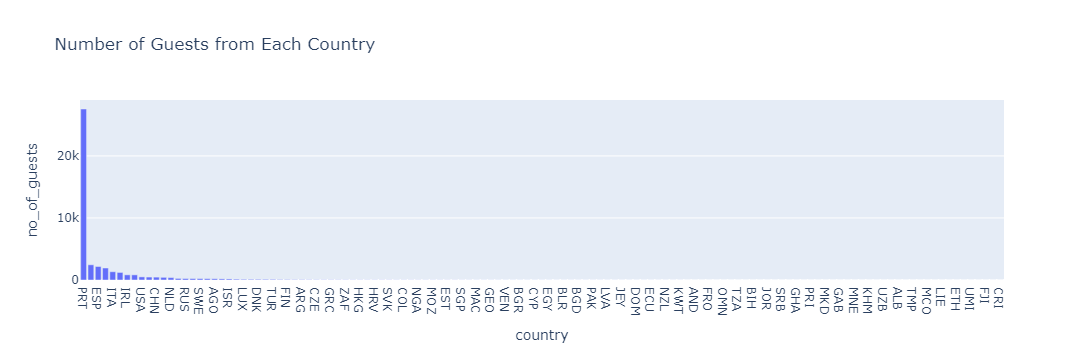

In [54]:
import plotly.express as px
px.bar(country_wise_data,x='country',y='no_of_guests',title='Number of Guests from Each Country')

### Conclusion : People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe

## How much do the guests pay for a room per night?

### Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

In [55]:
data2 = data[data['is_canceled']==1]

In [56]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

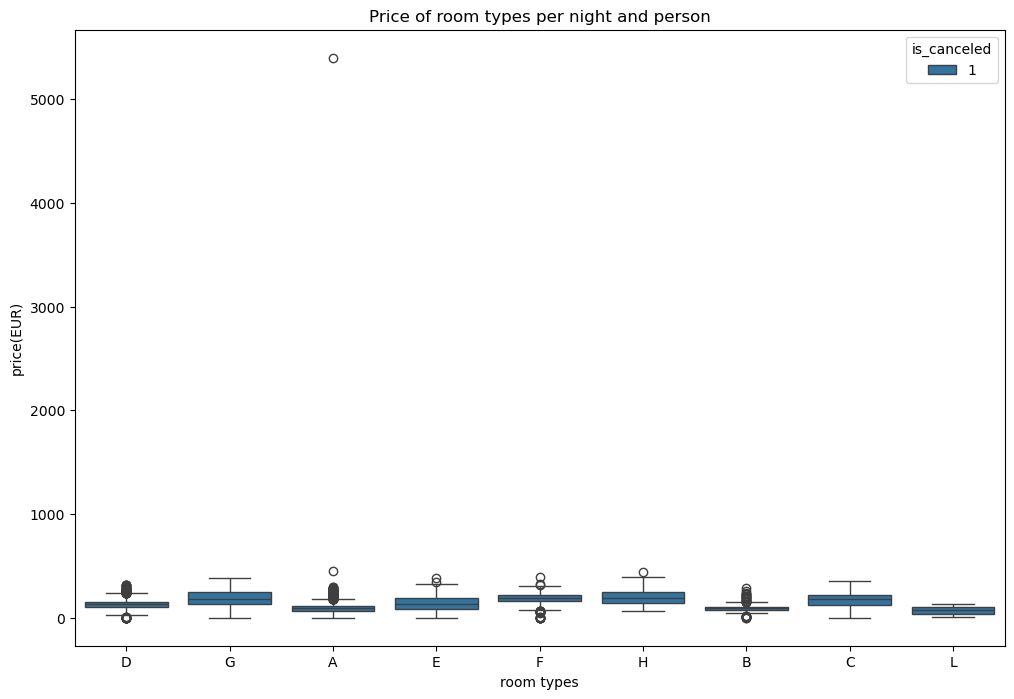

In [124]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='is_canceled',data=data2)
plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price(EUR)');

### This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

### Bivariate Analysis

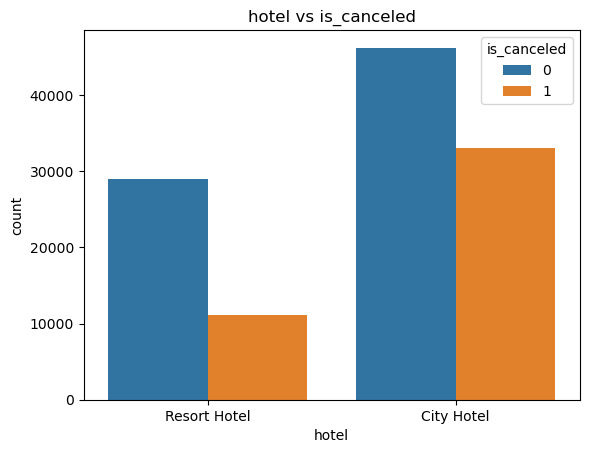

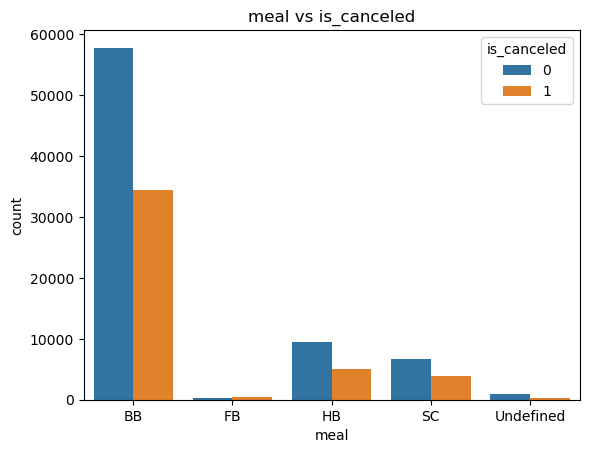

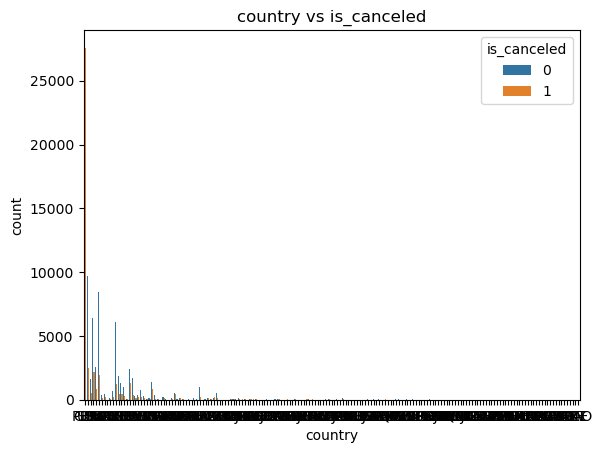

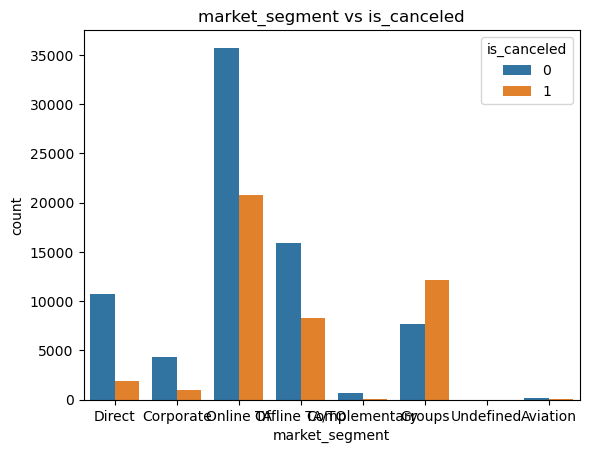

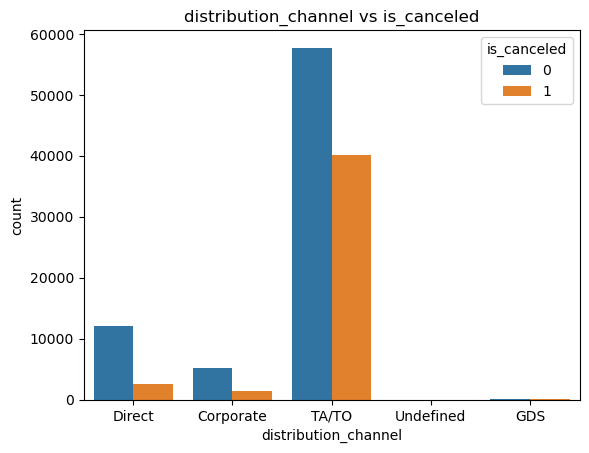

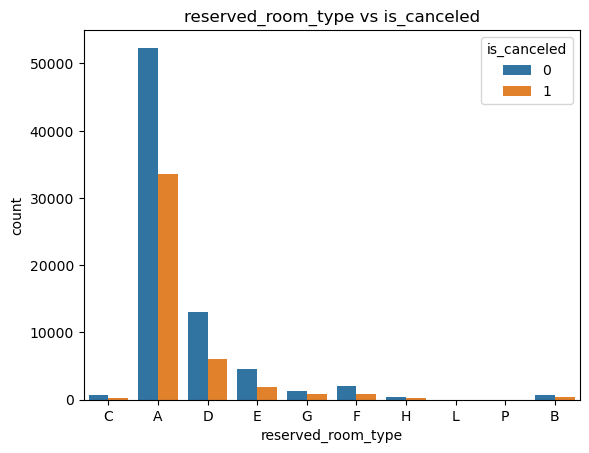

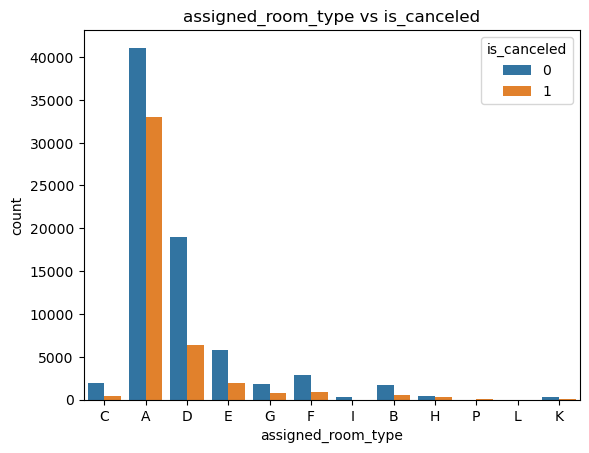

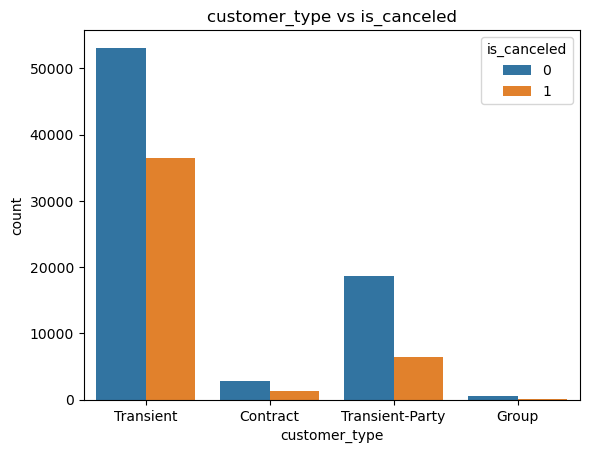

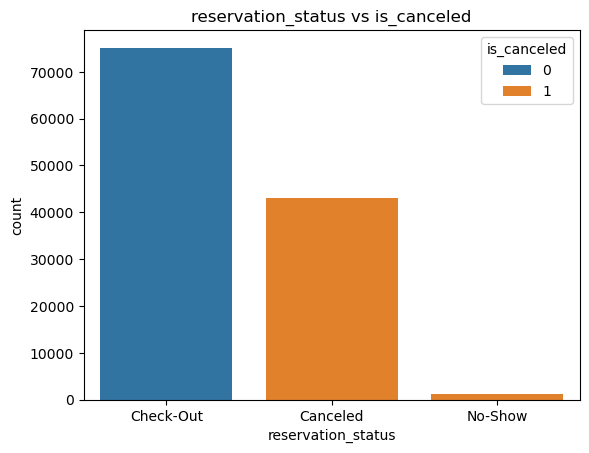

In [126]:
# Bar plot for categorical features with respect to cancellations
categorical_columns = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status']
for col in categorical_columns:
    sns.countplot(x=col, hue='is_canceled', data=df)
    plt.title(f'{col} vs is_canceled')
    plt.show()

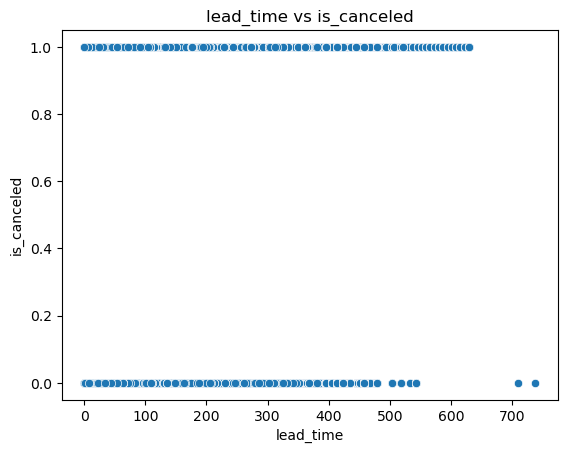

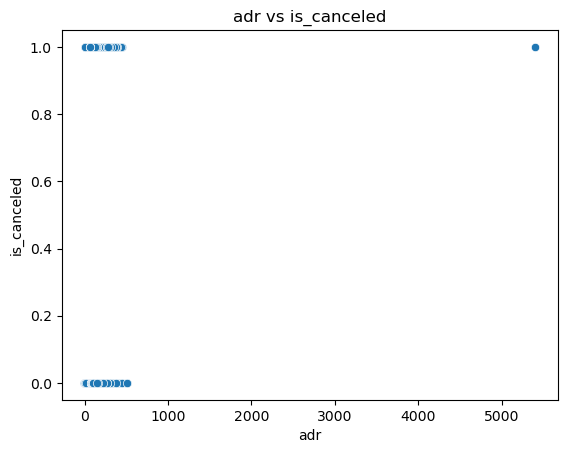

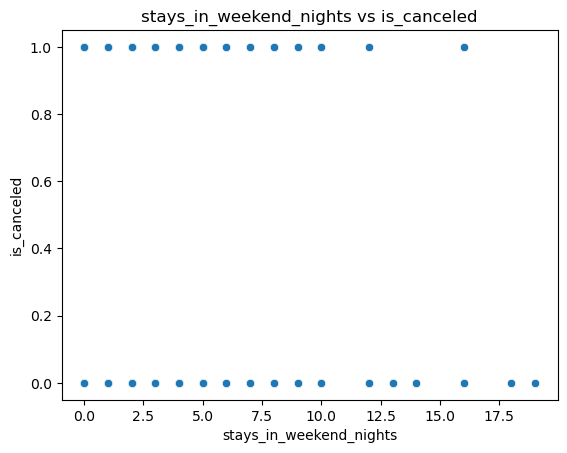

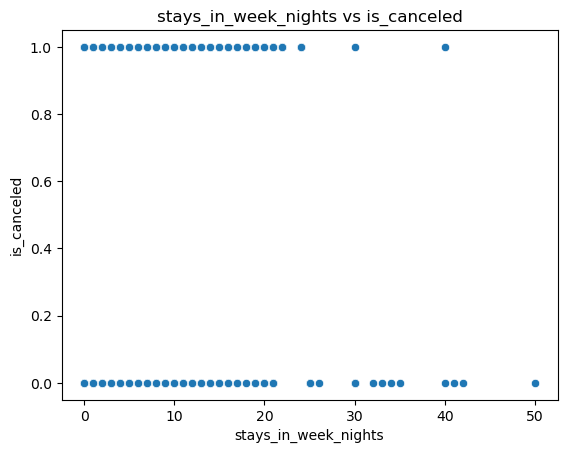

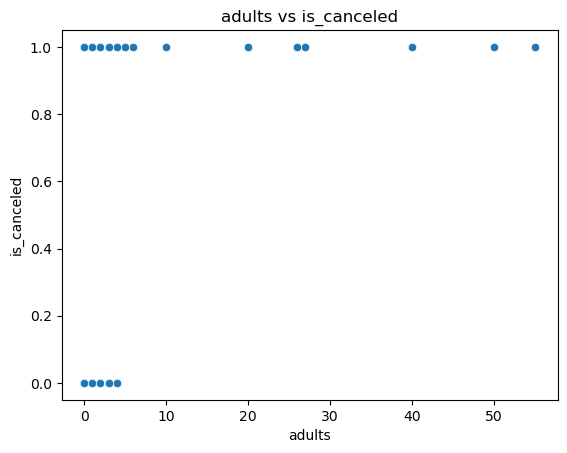

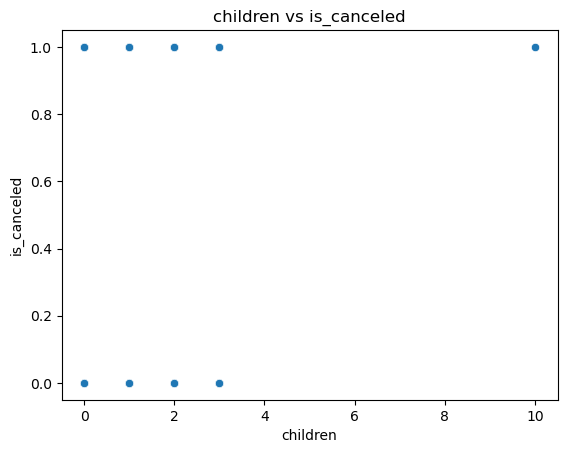

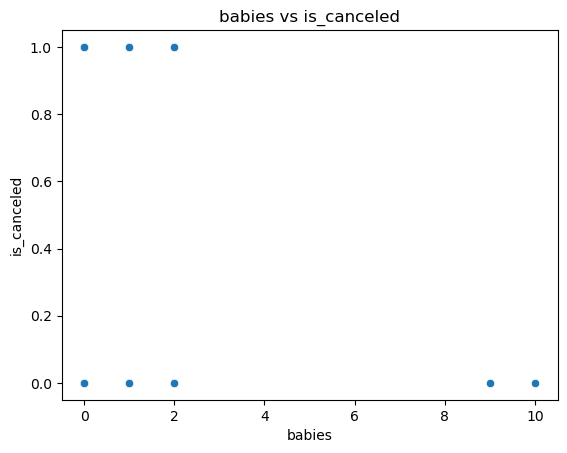

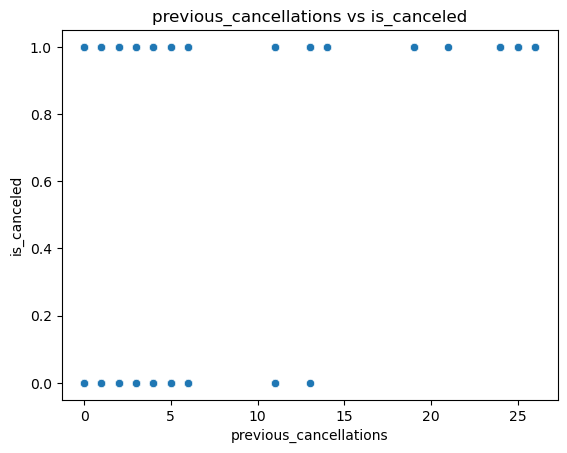

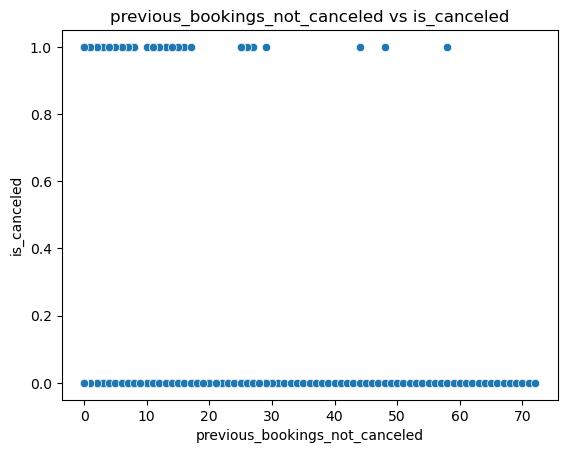

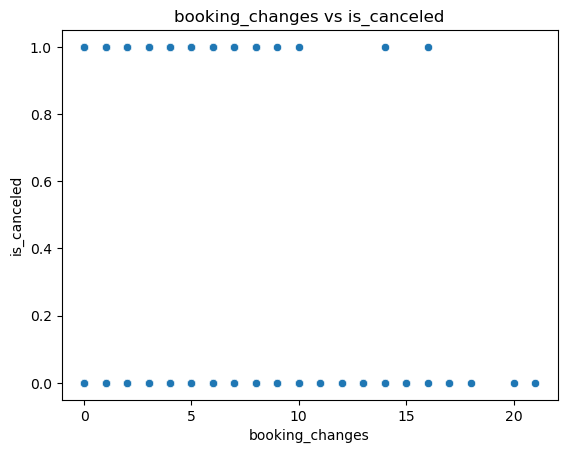

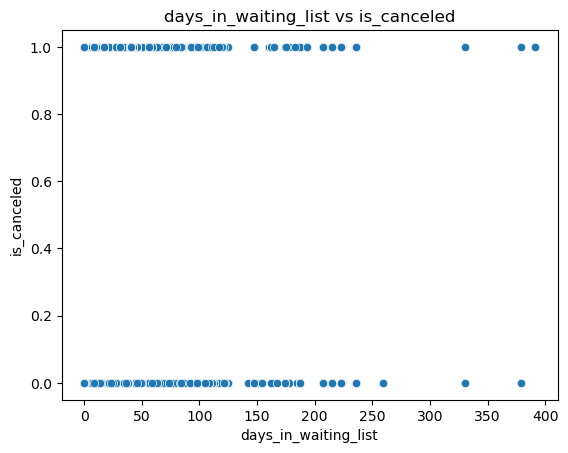

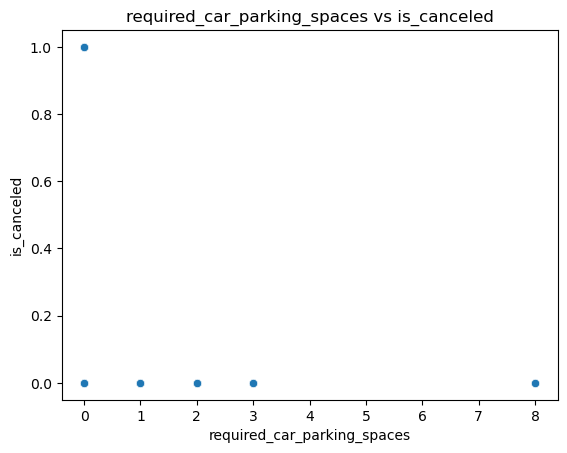

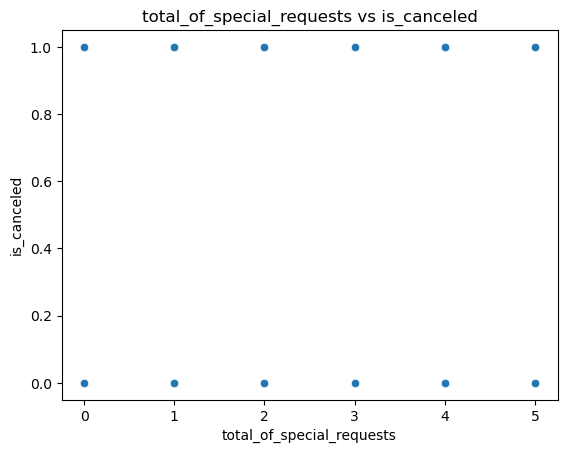

In [128]:
# Scatter plot for numerical features with respect to cancellations
numerical_columns = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
for col in numerical_columns:
    sns.scatterplot(x=col, y='is_canceled', data=df)
    plt.title(f'{col} vs is_canceled')
    plt.show()

### Predictive Analysis

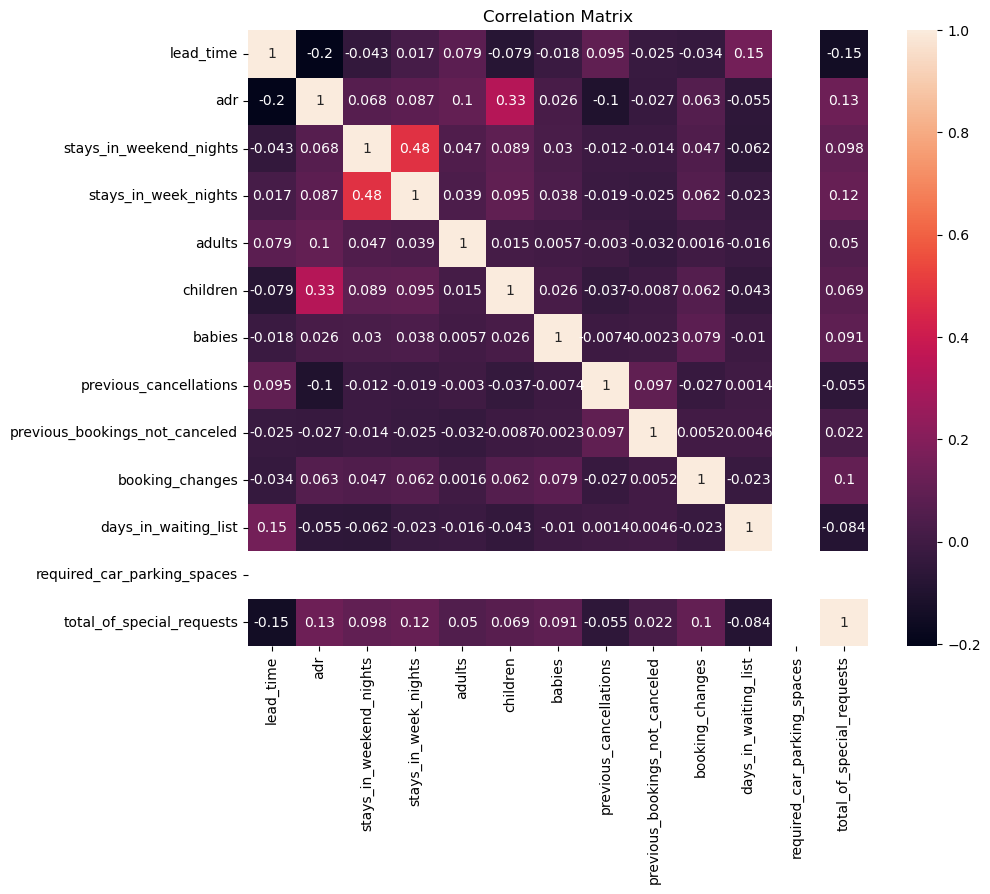

In [132]:
# Correlation matrix for numerical features
plt.figure(figsize=(10,8))
cancelled_df = df[df['is_canceled'] == 1]
correlation_matrix = cancelled_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

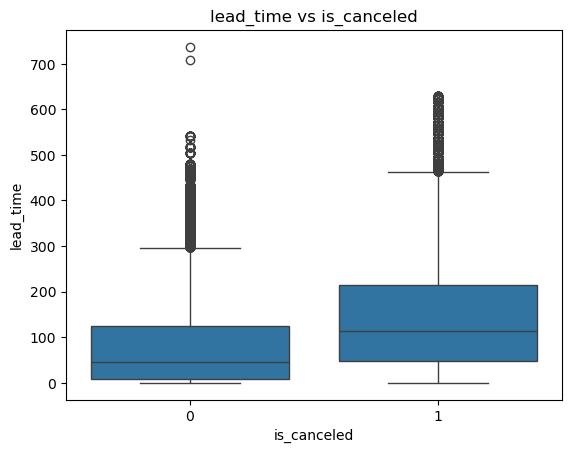

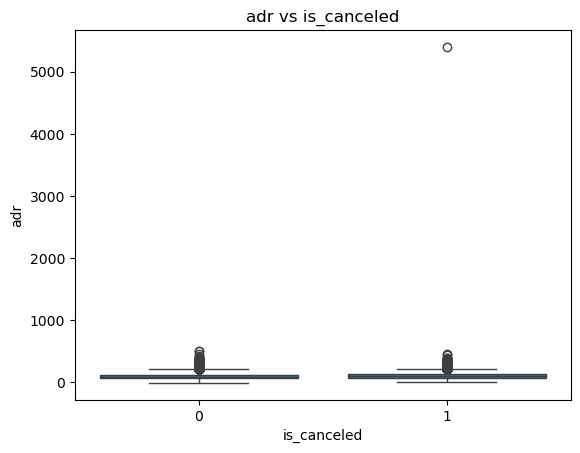

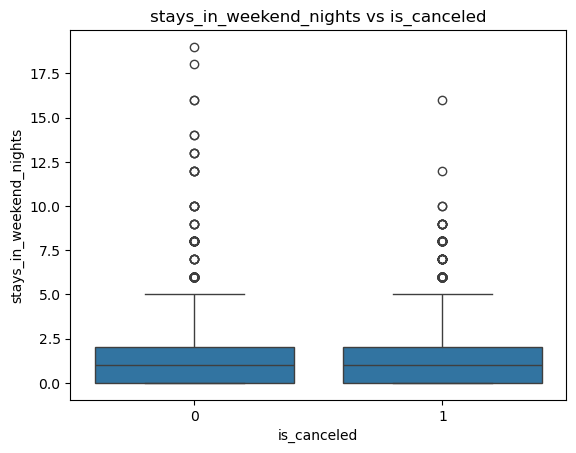

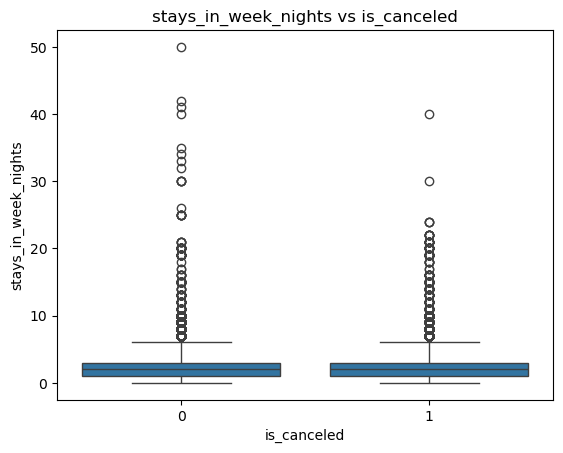

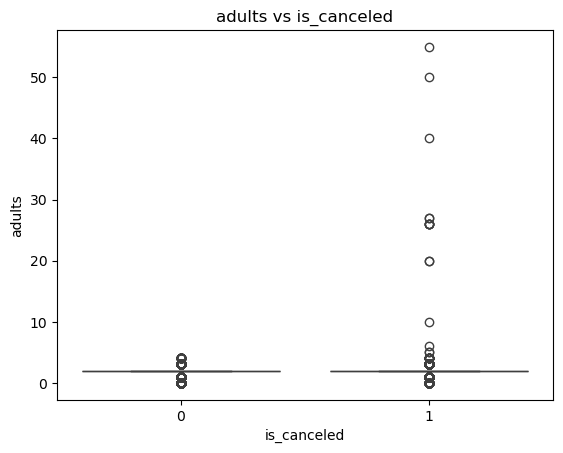

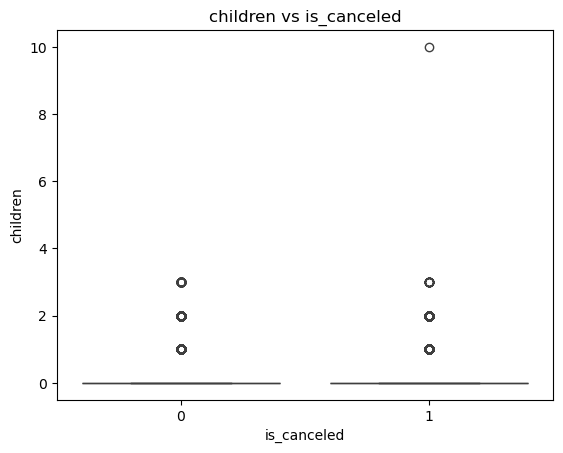

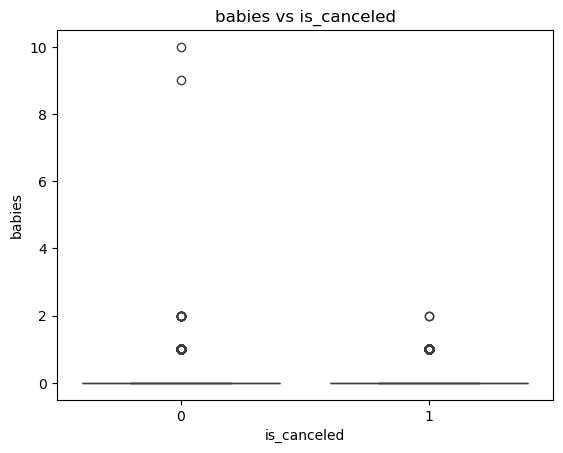

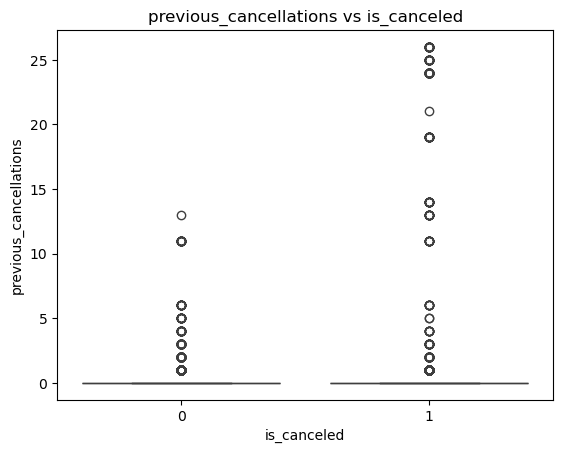

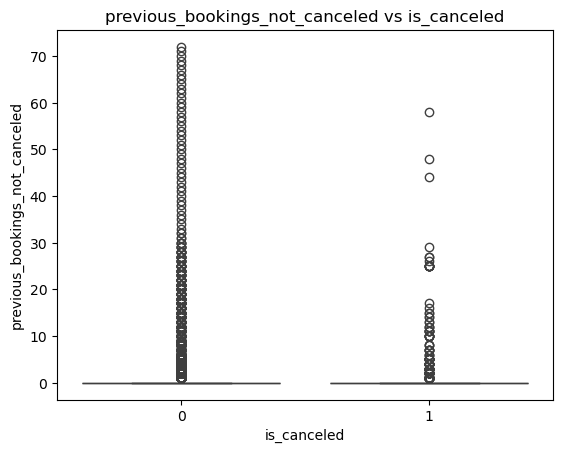

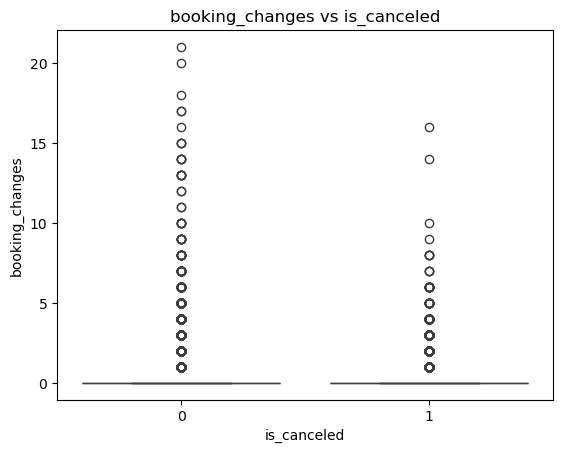

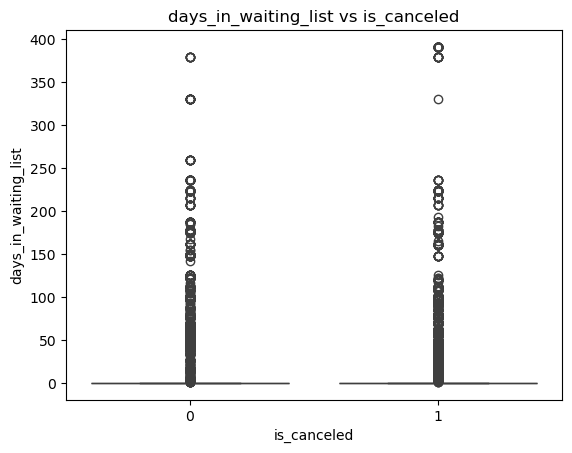

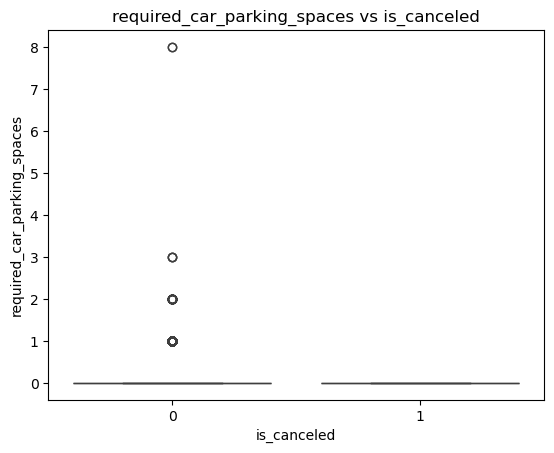

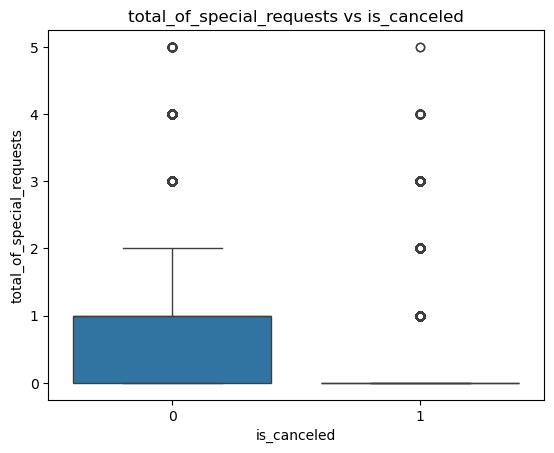

In [134]:
# Box plot for numerical features with respect to cancellations
for col in numerical_columns:
    sns.boxplot(x='is_canceled', y=col, data=df)
    plt.title(f'{col} vs is_canceled')
    plt.show()

## Which are the most busy month?

In [58]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [59]:
data_resort = data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==1)]
data_city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==1)]

In [60]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,5/29/2015


In [61]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns = ['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,1637
1,July,1436
2,April,1059
3,May,1024
4,June,1007
5,September,1006
6,October,978
7,February,794
8,March,763
9,December,631


In [62]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,May,3653
1,August,3600
2,June,3527
3,April,3459
4,July,3301
5,October,3268
6,September,3109
7,March,2385
8,February,1899
9,December,1737


In [63]:
final_rush = rush_resort.merge(rush_city,on='month')
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_city']
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,1637,3600
1,July,1436,3301
2,April,1059,3459
3,May,1024,3653
4,June,1007,3527
5,September,1006,3109
6,October,978,3268
7,February,794,1899
8,March,763,2385
9,December,631,1737


### Now we will observe over here is month column is not in order, & if we will visualise we will get improper conclusion. So very first we have to provide right hierarchy to the month column

In [64]:
from plotly.offline import init_notebook_mode, iplot

In [65]:
final_rush['month'] = pd.Categorical(final_rush['month'],categories=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'],ordered=True)
final_rush = final_rush.sort_values('month')

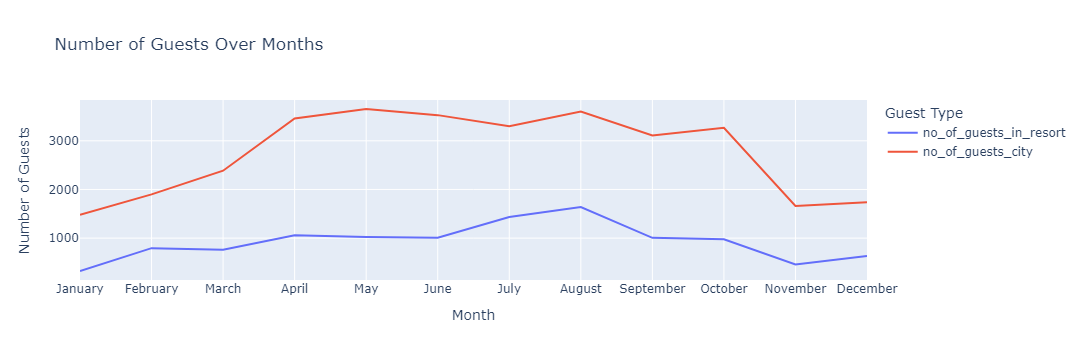

In [66]:
px.line(final_rush,x='month',y=['no_of_guests_in_resort', 'no_of_guests_city'],title='Number of Guests Over Months',labels={'month': 'Month', 'value': 'Number of Guests', 'variable': 'Guest Type'})

### Conclusion
### This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here).       The price of the city hotel varies less and is most expensive during spring and autumn.

## Which month has the highest adr?

In [67]:
!pip install sort_dataframeby_monthorweek

In [68]:
!pip install sorted-months-weekdays

In [69]:
import sort_dataframeby_monthorweek as sd

In [70]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

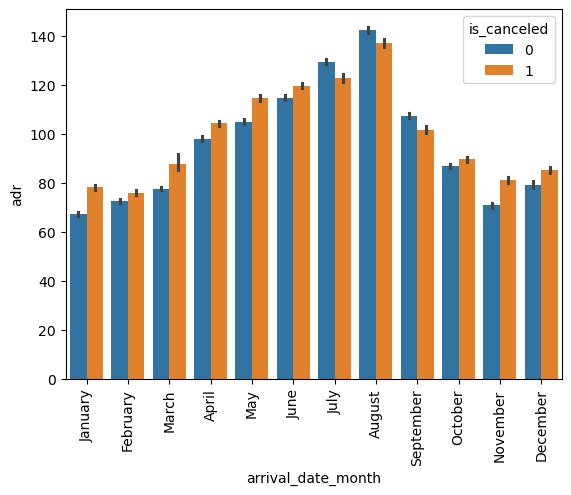

In [71]:
sns.barplot(x='arrival_date_month',y='adr',data=data,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show();

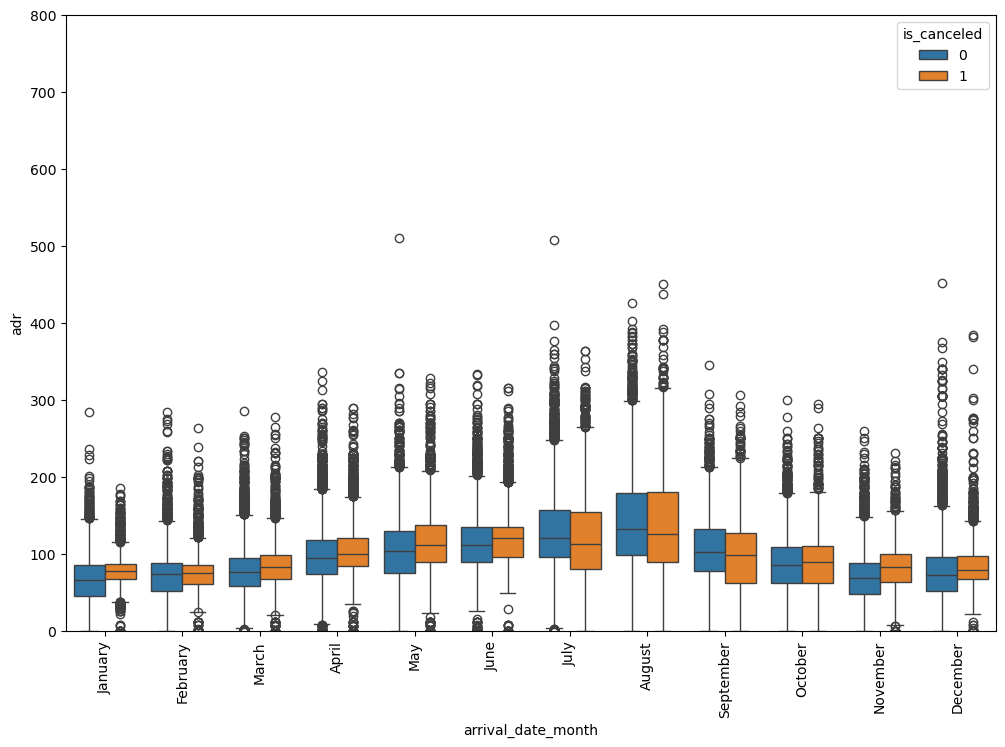

In [72]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.ylim(0,800)
plt.show()

### Lets analyse whether bookings were only for weekdays or for weekends or for both?

In [73]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Let's create a relation table

In [74]:
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    if row[feature2]==0 and row[feature1] >0:
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0:
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0:
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

### If the number of weekday nights (stays_in_week_nights) is 0 and the number of weekend nights (stays_in_weekend_nights) i greater than 0 , it means the stay is just during the weekend.

### If the number of weekday nights is greater than 0 and the number of weekend nights is 0, it means the stay is just during the weekdays.

### If both the number of weekday nights and the number of weekend nights are greater than 0, it means the stay includes both weekdays and weekends.

### If none of the above conditions are met, it means the data is undefined (both weekday and weekend nights are 0).

In [76]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

In [77]:
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,Canceled,5/6/2015,stay_just_weekdays
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,Canceled,4/22/2015,stay_just_weekdays
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,No Deposit,0,Transient,123.0,0,0,Canceled,6/23/2015,stay_just_weekdays
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,0,No Deposit,0,Transient,107.0,0,2,Canceled,5/11/2015,stay_both_weekdays_weekends
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,0,No Deposit,0,Transient,108.3,0,2,Canceled,5/29/2015,stay_both_weekdays_weekends


In [78]:
data2['weekend_or_weekday'].value_counts()

weekend_or_weekday
stay_both_weekdays_weekends    22837
stay_just_weekdays             19462
stay_just_weekend               1877
undefined_data                    23
Name: count, dtype: int64

In [79]:
type(sd)

module

In [80]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [81]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    2397
                    stay_just_weekdays             1861
                    stay_just_weekend               257
                    undefined_data                    3
August              stay_both_weekdays_weekends    3016
                    stay_just_weekdays             2084
                    stay_just_weekend               137
December            stay_both_weekdays_weekends    1227
                    stay_just_weekdays             1066
                    stay_just_weekend                74
                    undefined_data                    1
February            stay_both_weekdays_weekends    1231
                    stay_just_weekdays             1282
                    stay_just_weekend               173
                    undefined_data                    7
January             stay_both_weekdays_weekends     789
                    stay_just_weekdays              950


### This code will sort the DataFrame by month, categorize the stays, and then group by month and stay type to give the size of each group

In [82]:
group_data = data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [83]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [84]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [85]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,789.0,950.0,64.0,3.0
February,1231.0,1282.0,173.0,7.0
March,1554.0,1452.0,140.0,2.0
April,2397.0,1861.0,257.0,3.0
May,2277.0,2180.0,218.0,2.0
June,2154.0,2257.0,121.0,2.0
July,2867.0,1710.0,159.0,1.0
August,3016.0,2084.0,137.0,NaN
September,2102.0,1839.0,173.0,1.0


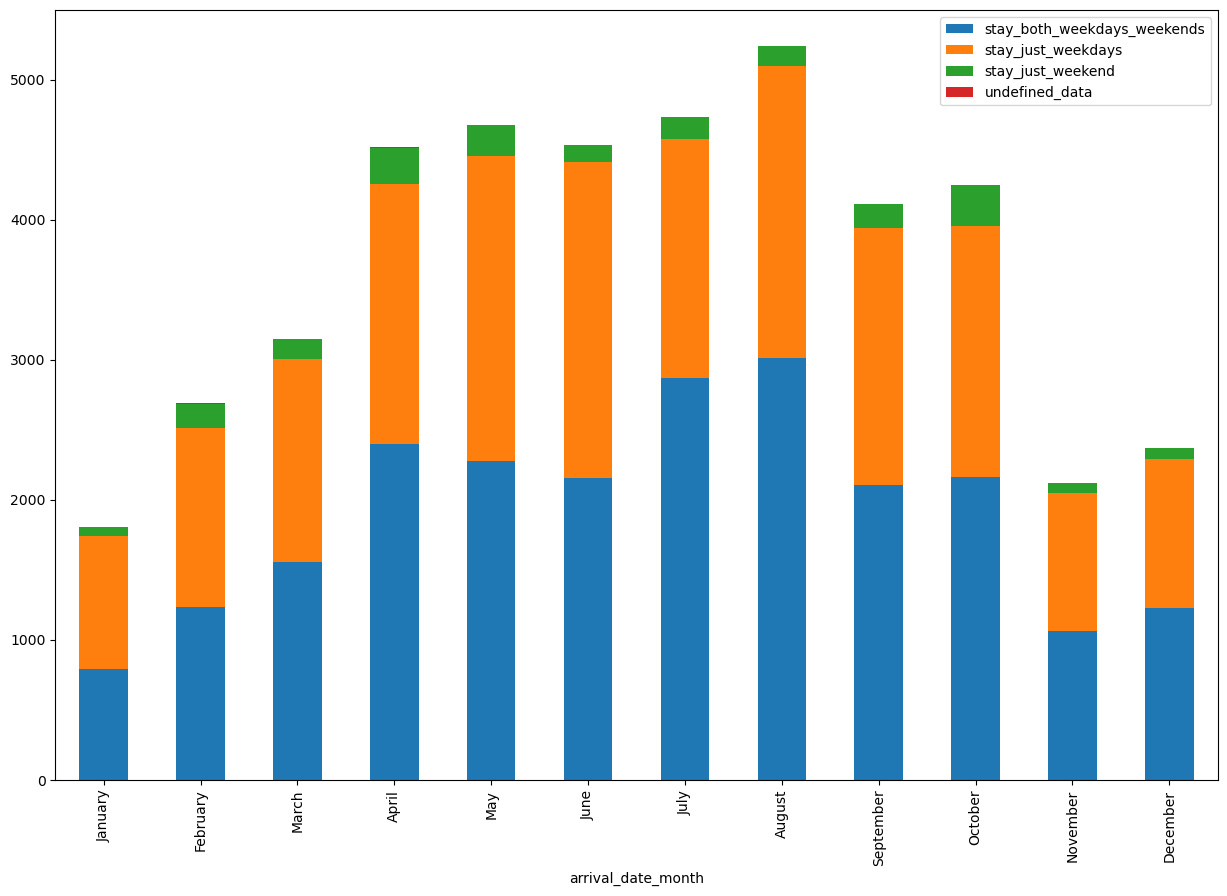

In [86]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10));

### Feature Encoding

In [87]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,D,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,H,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,D,0,No Deposit,0,Transient,89.00,0,1,No-Show,1/1/2016
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,D,0,No Deposit,0,Transient,73.46,0,2,Check-Out,1/3/2016
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,G,0,No Deposit,0,Transient,119.00,0,0,Canceled,12/22/2015


In [88]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [89]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [90]:
cate_features=[col for col in data.columns if data[col].dtype=='object']

In [91]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [92]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [93]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [94]:
data_cat=data[cate_features]

In [95]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [96]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [97]:
data_cat['cancellation']=data['is_canceled']

In [98]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,No Deposit,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,No Deposit,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,No Deposit,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,No Deposit,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,No Deposit,Transient,Canceled,12/22/2015,1


In [99]:
cols=data_cat.columns

In [100]:
cols=cols[0:-1]

In [101]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

##### Mean Encoding

In [102]:
for col in cols:
    dict2 = data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [103]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.28402,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.28402,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.28402,0.407864,1.0,0.101010,1
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.28402,0.407864,0.0,0.108247,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.28402,0.407864,1.0,0.684211,1


### Outliers

In [104]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,109,2016,1,1,0,1,2,0.0,0,0,0,0,0,0,59.94,0,1
1,0,109,2016,1,1,0,1,2,2.0,0,0,0,0,0,0,116.10,1,1
2,1,2,2016,1,1,0,1,2,0.0,0,0,0,0,0,0,89.00,0,1
3,0,88,2016,1,1,0,2,2,0.0,0,0,0,0,0,0,73.46,0,2
4,1,20,2016,1,1,0,2,2,2.0,0,0,0,0,0,0,119.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,2,1.0,0,0,0,0,4,0,117.82,0,1
119206,0,17,2016,53,30,2,5,2,0.0,0,0,0,0,0,0,90.34,0,1
119207,0,107,2016,53,31,2,5,2,0.0,0,0,0,0,0,0,103.57,0,0
119208,0,310,2016,53,27,2,10,2,0.0,0,0,0,0,2,0,68.57,0,2


In [105]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [106]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'cancellation', 'is_canceled', 'lead_time',
       'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [107]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [108]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.28402,0.254504,...,0.0,0,0,0,0,0,0,59.94,0,1
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.28402,0.254504,...,2.0,0,0,0,0,0,0,116.10,1,1
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.28402,0.407864,...,0.0,0,0,0,0,0,0,89.00,0,1


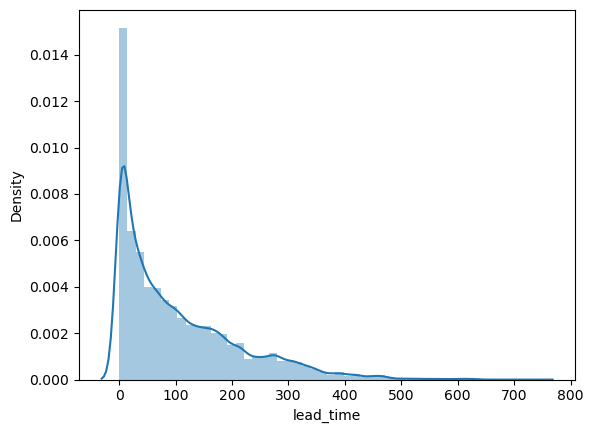

In [109]:
sns.distplot(dataframe['lead_time']);

In [110]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

In [111]:
handle_outlier=np.log1p(dataframe[col])

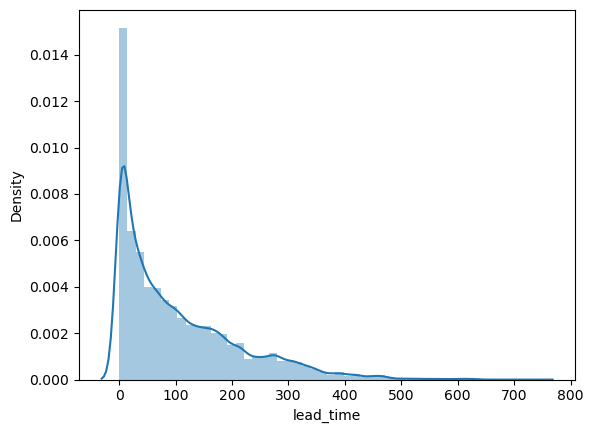

In [112]:
sns.distplot(dataframe['lead_time']);

### Lead Time: Several high values indicate bookings made well in advance.

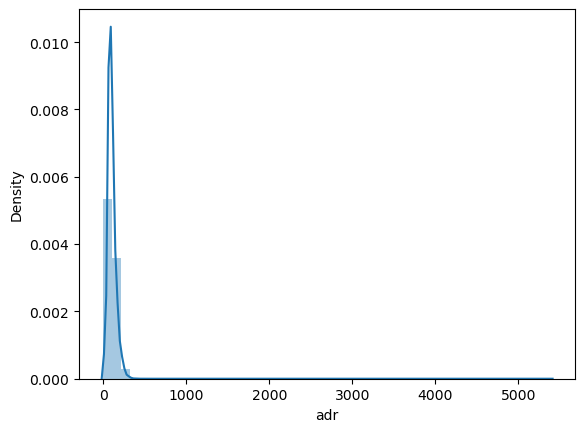

In [113]:
sns.distplot(dataframe['adr']);

In [114]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.28402,0.254504,...,0.0,0,1,0,2,2,0,-6.38,0,0


In [115]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

In [116]:
handle_outlier('adr')

In [117]:
dataframe['adr'].isnull().sum()

1

### Now the missing value suddenly appears, as we have already deal with the missing values It's because we have negative value in 'adr' feature as '-6.38', & if we apply ln(1+x) , we will get 'nan'because log won't take negative values.

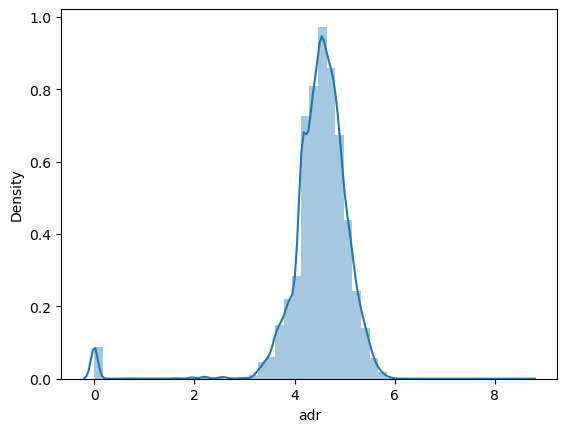

In [118]:
sns.distplot(dataframe['adr'].dropna());

### Average Daily Rate, which might have significant outliers.